# Data Preprocessing

>## **1. Import packages**

In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure
%matplotlib inline

>## **2. Load dataset**

In [215]:
df= pd.read_csv('Biometric Data.csv')
df2= pd.read_csv('Medical Records.csv')
df3= pd.read_csv('Patient Data.csv')

"\ndf= pd.read_csv('Biometric Data.csv')\ndf2= pd.read_csv('Medical Records.csv')\ndf3= pd.read_csv('Patient Data.csv')\n"

In [216]:
df.head(3)

,patient_id,age,gender,marital_status,ethnicity,zip_code
0,PAT00001,33.0,Male,Divorced,African American,92106
1,PAT00002,54.0,Female,Married,African American,24249
2,PAT00003,65.0,Female,Married,Caucasian,81306


In [217]:
df2.head(3)

,record_id,patient_id,diagnosis,diagnosis_date,visit_type,physician,cost
0,REC000419,PAT03567,Common Cold,6/8/2020,Outpatient,Dr. Williams,160.03
1,REC002378,PAT09059,Common Cold,6/8/2020,Outpatient,Dr. Williams,158.39
2,REC002666,PAT13410,Common Cold,6/8/2020,Telehealth,Dr. Brown,61.55


In [218]:
df3.head(3)

,patient_id,bmi,blood_pressure_systolic,blood_pressure_diastolic,cholesterol_total
0,PAT09803,26.341428,124,75,265.0
1,PAT15758,26.083063,130,78,172.0
2,PAT17050,23.629059,102,102,128.0


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      20000 non-null  object 
 1   age             19800 non-null  float64
 2   gender          19900 non-null  object 
 3   marital_status  20000 non-null  object 
 4   ethnicity       20000 non-null  object 
 5   zip_code        20000 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 937.6+ KB


In [220]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   record_id       30000 non-null  object 
 1   patient_id      30000 non-null  object 
 2   diagnosis       30000 non-null  object 
 3   diagnosis_date  30000 non-null  object 
 4   visit_type      30000 non-null  object 
 5   physician       30000 non-null  object 
 6   cost            29850 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.6+ MB


In [221]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                14000 non-null  object 
 1   bmi                       13860 non-null  float64
 2   blood_pressure_systolic   14000 non-null  int64  
 3   blood_pressure_diastolic  14000 non-null  int64  
 4   cholesterol_total         13888 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 547.0+ KB


>## **3. Handle missing values**

I created a for loop to iterate among all columns to realize whether they have null values or not. I’m looking for the number of null values in every single column as well as the percentage of null values.

In [222]:
for col in df.columns:
    number_null = df.loc[: , col].isnull().sum()
    perc_null = (number_null / df.shape[0]) * 100
    print('{} - {} - %{}'.format(col, number_null, round(perc_null,3)))

patient_id - 0 - %0.0
age - 200 - %1.0
gender - 100 - %0.5
marital_status - 0 - %0.0
ethnicity - 0 - %0.0
zip_code - 0 - %0.0


In [223]:
for col in df2.columns:
    number_null = df2.loc[: , col].isnull().sum()
    perc_null = (number_null / df2.shape[0]) * 100
    print('{} - {} - %{}'.format(col, number_null, round(perc_null,3)))

record_id - 0 - %0.0
patient_id - 0 - %0.0
diagnosis - 0 - %0.0
diagnosis_date - 0 - %0.0
visit_type - 0 - %0.0
physician - 0 - %0.0
cost - 150 - %0.5


In [224]:
for col in df3.columns:
    number_null = df3.loc[: , col].isnull().sum()
    perc_null = (number_null / df3.shape[0]) * 100
    print('{} - {} - %{}'.format(col, number_null, round(perc_null,3)))

patient_id - 0 - %0.0
bmi - 140 - %1.0
blood_pressure_systolic - 0 - %0.0
blood_pressure_diastolic - 0 - %0.0
cholesterol_total - 112 - %0.8


In [225]:
print(df.columns.tolist())
print(df2.columns.tolist())
print(df3.columns.tolist())

['patient_id', 'age', 'gender', 'marital_status', 'ethnicity', 'zip_code']
['record_id', 'patient_id', 'diagnosis', 'diagnosis_date', 'visit_type', 'physician', 'cost']
['patient_id', 'bmi', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'cholesterol_total']


#### **Treating Missing Values (less than 5%)**

For some columns that the percentage of null values are less than 5%, we can either drop the records or impute, and for those have more than 5%, we should impute using methods like "Mode", "Mean", "Random Forest".

For now, Let’s impute the null values with the Mode (Most Frequent Category) for columns: "age", "gender", "cost", "bmi", "cholesterol_total"

In [226]:
# Find the most frequent category (mode)
mode_value = df['age'].mode()[0]
mode_value2 = df['gender'].mode()[0]

# Fill missing values with the mode
df['age'] = df['age'].fillna(mode_value)
df['gender'] = df['gender'].fillna(mode_value2)

In [227]:
# Find the most frequent category (mode)
mode_value = df2['cost'].mode()[0]

# Fill missing values with the mode
df2['cost'] = df2['cost'].fillna(mode_value)

In [228]:
# Find the most frequent category (mode)
mode_value = df3['bmi'].mode()[0]
mode_value2 = df3['cholesterol_total'].mode()[0]

# Fill missing values with the mode
df3['bmi'] = df3['bmi'].fillna(mode_value)
df3['cholesterol_total'] = df3['cholesterol_total'].fillna(mode_value2)

Integrity check: If still there is any Missing values for All columns

In [229]:
df.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      20000 non-null  object 
 1   age             20000 non-null  float64
 2   gender          20000 non-null  object 
 3   marital_status  20000 non-null  object 
 4   ethnicity       20000 non-null  object 
 5   zip_code        20000 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 937.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   record_id       30000 non-null  object 
 1   patient_id      30000 non-null  object 
 2   diagnosis       30000 non-null  object 
 3   diagnosis_date  30000 non-null  object 
 4   visit_type      30000 non-null  object 
 5   physician       30000 non-null  object 


In [230]:
print('Misisng values of df \n \n', df.isna().sum(),'\n')

print('Misisng values of df2 \n \n', df2.isna().sum(),'\n')

print('Misisng values of df3 \n \n', df3.isna().sum(),'\n')

Misisng values of df 
 
 patient_id        0
age               0
gender            0
marital_status    0
ethnicity         0
zip_code          0
dtype: int64 

Misisng values of df2 
 
 record_id         0
patient_id        0
diagnosis         0
diagnosis_date    0
visit_type        0
physician         0
cost              0
dtype: int64 

Misisng values of df3 
 
 patient_id                  0
bmi                         0
blood_pressure_systolic     0
blood_pressure_diastolic    0
cholesterol_total           0
dtype: int64 



>## **4. Handle Inconsistencies**










we checked data and there is no inconsistencies

>## **5. Handle duplicate rows**

This ensures the data is free of duplicates for accurate analysis. We found that there is no duplicates









In [231]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_count}")

Number of duplicate rows found: 0


In [232]:
# Check for duplicates
duplicate_count = df2.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_count}")

Number of duplicate rows found: 0


In [233]:
# Check for duplicates
duplicate_count = df3.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_count}")

Number of duplicate rows found: 0


=======================

>## **7. Data type convert**










Listing Data type

In [234]:
# Display the column names along with their data types
print(df.dtypes, '\n')
print(df2.dtypes, '\n')
print(df3.dtypes)

patient_id         object
age               float64
gender             object
marital_status     object
ethnicity          object
zip_code            int64
dtype: object 

record_id          object
patient_id         object
diagnosis          object
diagnosis_date     object
visit_type         object
physician          object
cost              float64
dtype: object 

patient_id                   object
bmi                         float64
blood_pressure_systolic       int64
blood_pressure_diastolic      int64
cholesterol_total           float64
dtype: object


Convert 'DATE' to Date format (Not Datetime)

In [235]:
# Convert 'diagnosis_date' to datetime if not already
df2['diagnosis_date'] = pd.to_datetime(df2['diagnosis_date'], errors='coerce')

# Keep only the date part
df2['diagnosis_date'] = df2['diagnosis_date'].dt.date

# Display the result
print(df2['diagnosis_date'].head())

0    2020-06-08
1    2020-06-08
2    2020-06-08
3    2020-06-08
4    2020-06-08
Name: diagnosis_date, dtype: object


Integrity check: Data type

In [236]:
# Display the column names along with their data types
print(df2.dtypes)

record_id          object
patient_id         object
diagnosis          object
diagnosis_date     object
visit_type         object
physician          object
cost              float64
dtype: object


# Data Modeling

This diagram represents the data modeling approach used in our project, following a star schema design.

-  The central fact table is medical_records, which stores key events like diagnoses, visit types, costs, and physician information.

- It is connected to two dimension tables:

    patients — providing demographic details (age, gender, marital status, etc.)

    biometrics — containing biometric measurements (BMI, blood pressure, cholesterol)

This structure allows us to efficiently integrate, query, and analyze healthcare data by linking patient attributes and measurements to their medical events.

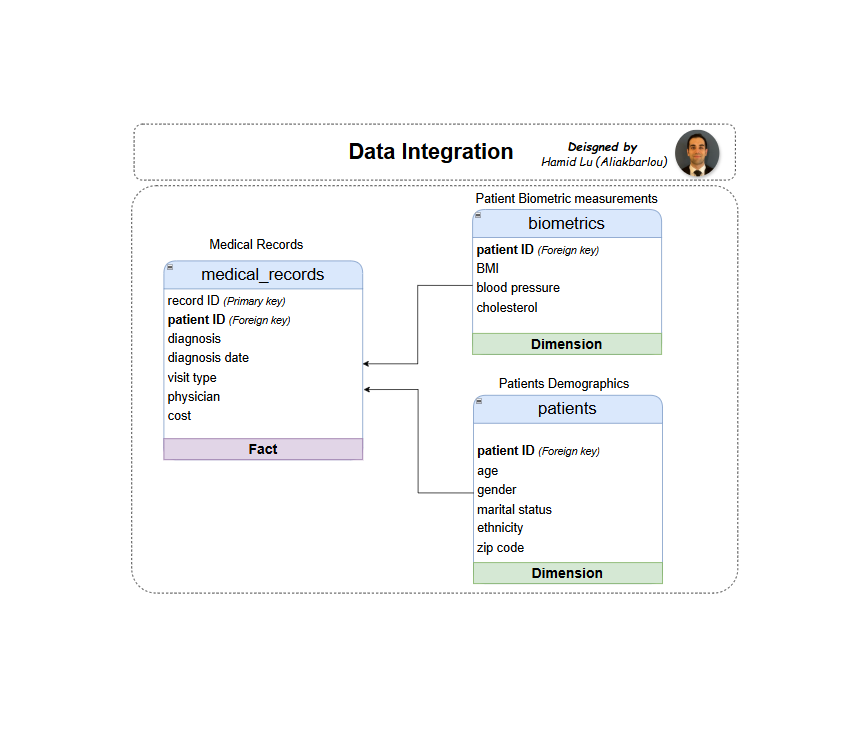

#4. Predictive Modeling

##4.1. Logistic Regression

####1. Prepare the Data

In [283]:
# Merge patients + medical records
df_merged1 = pd.merge(df, df2, on='patient_id', how='inner')

# Merge with biometric data
merged_df = pd.merge(df_merged1, df3, on='patient_id', how='inner')

Create Binary Target for Diabetes

In [284]:
# Create a binary column: 1 if diagnosis contains 'diabetes', else 0
merged_df['has_diabetes'] = merged_df['diagnosis'].str.contains('diabetes', case=False, na=False).astype(int)

In [285]:
merged_df.shape

(21009, 19)

In [286]:
merged_df.head(1)

,patient_id,age,gender,marital_status,ethnicity,zip_code,age_group,bmi_group,record_id,diagnosis,diagnosis_date,visit_type,physician,cost,bmi,blood_pressure_systolic,blood_pressure_diastolic,cholesterol_total,has_diabetes
0,PAT00001,33.0,Male,Divorced,African American,92106,18-34,Overweight,REC022096,Common Cold,2024-04-11,Emergency,Dr. Williams,60.32,21.283985,131,78,191.0,0


In [287]:
# Select relevant columns
features = ['bmi', 'age', 'blood_pressure_systolic']
#features = ['bmi']

target = 'has_diabetes'

X = merged_df[features]
y = merged_df[target]

####Check if data is imbalanced? Yes it is

In [288]:
y[y==1].shape

(3346,)

In [289]:
y[y==0].shape

(17663,)

####Split the Data

In [290]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

In [291]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####Handle Class Imbalance

In [292]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [293]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

####Choose Regression as our model

In [294]:
# Create and train the model
model = LogisticRegression()
#--model.fit(X_train, y_train)
model.fit(X_resampled, y_resampled)

LogisticRegression()

####Predictions

In [295]:
# Predict on test data
y_pred = model.predict(X_test)

####Performance

In [296]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2082 1440]
 [ 254  426]]
              precision    recall  f1-score   support

           0       0.89      0.59      0.71      3522
           1       0.23      0.63      0.33       680

    accuracy                           0.60      4202
   macro avg       0.56      0.61      0.52      4202
weighted avg       0.78      0.60      0.65      4202



##4.2. XGBoost


1 - Import Libraries

In [297]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

Features and target


In [298]:
features = ['bmi', 'age', 'blood_pressure_systolic']
target = 'has_diabetes'

X = merged_df[features]
y = merged_df[target]

Combine X and y to prepare for resampling


In [299]:
df = pd.concat([X, y], axis=1)

Balance the data (upsampling )


In [300]:
class_0 = df[df[target] == 0]
class_1 = df[df[target] == 1]   # diabetic

class_1_upsampled = resample(class_1,replace=True, n_samples=len(class_0), random_state=42)

balanced_df = pd.concat([class_0, class_1_upsampled])

# back into X and y
X = balanced_df[features]
y = balanced_df[target]

In [301]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
#X, y = smote.fit_resample(X_train, y_train)

Split


In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:21:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Predict and evaluate


Confusion Matrix:
 [[2377 1149]
 [ 732 2808]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.67      0.72      3526
           1       0.71      0.79      0.75      3540

    accuracy                           0.73      7066
   macro avg       0.74      0.73      0.73      7066
weighted avg       0.74      0.73      0.73      7066



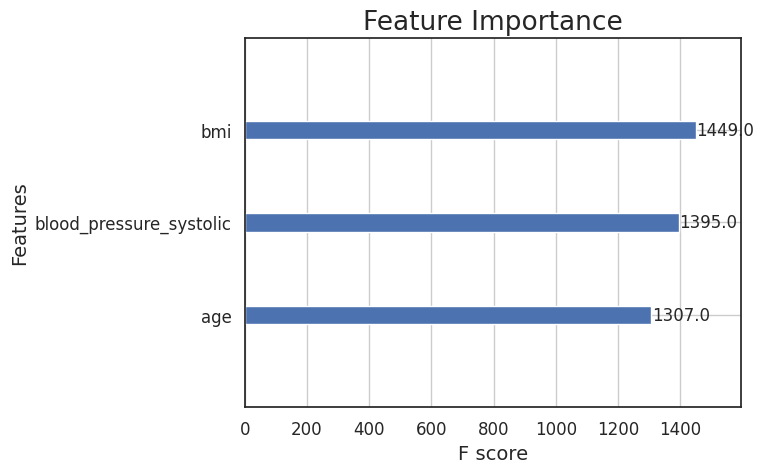

In [303]:
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 8. Show feature importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Summary & Output

##  Goal  
We aim to build a machine learning model to predict whether a patient has **diabetes**, using health-related features.

---

## Feature Engineering

We started with **7 features**:
- BMI, Age, Systolic BP, Diastolic BP, Gender, Marital Status, Ethnicity

### Step 1: Remove weak features  
- Based on visual analysis and insights and EDA, we removed:  
   **Gender, Marital Status, Ethnicity** — no clear relationship with diseases

### Step 2: Test remaining features  
- We used **boxplots** and **t-tests** to test the relationship between diabetes and the remaining numeric features.
- We made sure they followed **normal distribution** in both diabetic (1) and non-diabetic (0) groups.

Final selected features for diabetes:
- **BMI**
- **Age**
- **Systolic Blood Pressure**

---

## Target and Features

- **Target**: `has_diabetes` (0 or 1)  
- **Selected features**:  
  `bmi`, `age`, `blood_pressure_systolic`

---

## Dealing with Imbalanced Data

We had much fewer diabetic cases, so we balanced the data:

- **Logistic Regression** → Used **SMOTE**  
- **XGBoost** → Used **upsampling** (copied minority cases)

---

## Model Selection

We used two models:

- **Logistic Regression**  
  Simple and good for binary outcomes

- **XGBoost**  
  Powerful and handles imbalanced data well

Other model candidates like Random Forest or KNN were skipped to save time.

---

## Results Summary

| Metric       | Logistic Regression | XGBoost    |
|--------------|---------------------|------------|
| Accuracy     | 69%                | 73%       |
| Precision    | 67%                | 72%       |
| Recall       | 62%                | 78%       |
| F1 Score     | 64%                | 74%       |

---

## Conclusion

- **XGBoost performed better**, especially for finding diabetic cases.
- **BMI, Age, and Systolic BP** are strong predictors of diabetes.
- Logistic regression still works well as a baseline.
- The model is reliable and can be improved further with more features or fine-tuning.

## If we had more time

-  Add more lifestyle features using extra resources

-  Try more models and tuning

-  Use smarter feature selection
